In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno ( XÓA CÁI NÀY CŨNG ĐC )
import missingno as msno
######
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report

##EDA

In [ ]:
# reading dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# lấy thông tin về tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# nhận thông tin thống kê về tập dữ liệu
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Kiểm tra dữ liệu trùng lặp
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# nhận các tính năng số và phân loại từ tập dữ liệu
numerical_features = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'o', 'object']]
categorical_fatures = [feature for feature in df.columns if df[feature].dtypes in ['O', 'o', 'object']]
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

##Visualization

In [ ]:
from matplotlib import rcParams

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

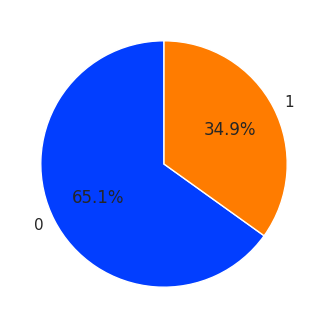

In [ ]:
# vẽ một biểu đồ truy cập để hiểu rõ hơn về tính năng mục tiêu
palette_color = sns.color_palette('bright')
plt.figure(figsize=(8,4))
plt.pie(df['Outcome'].value_counts(), labels=df['Outcome'].value_counts().index, colors=palette_color, autopct='%1.1f%%',startangle=90)
plt.show()

In [ ]:
rcParams['figure.figsize'] = 20,30
sns.set(font_scale = 2)
plt.subplots_adjust(hspace=0.5)

<Figure size 2000x3000 with 0 Axes>

<Axes: title={'center': 'Box Plot'}, ylabel='Pregnancies'>

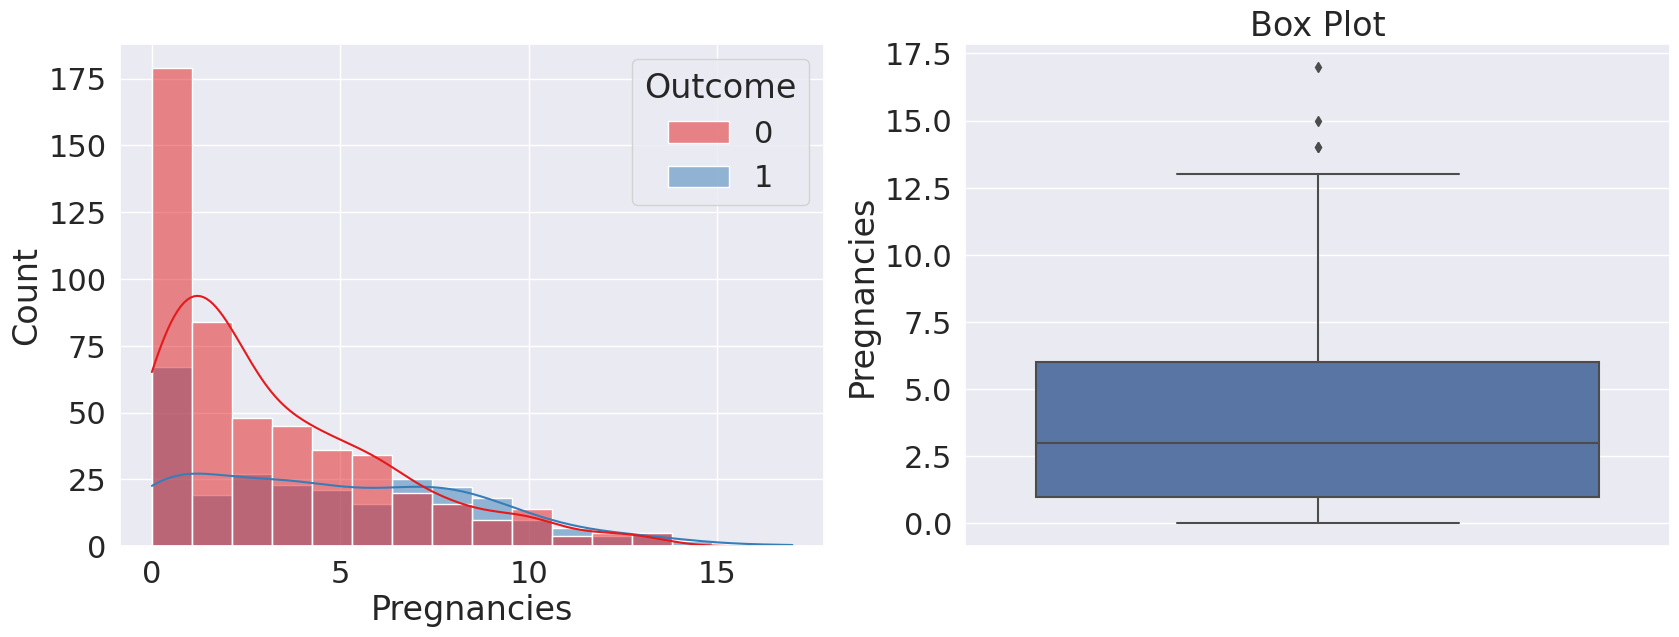

In [ ]:
#Pregnancy
plt.subplot(4,2,1)
sns.histplot(data=df, x='Pregnancies', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["Pregnancies"])

<Axes: title={'center': 'Box Plot'}, ylabel='Glucose'>

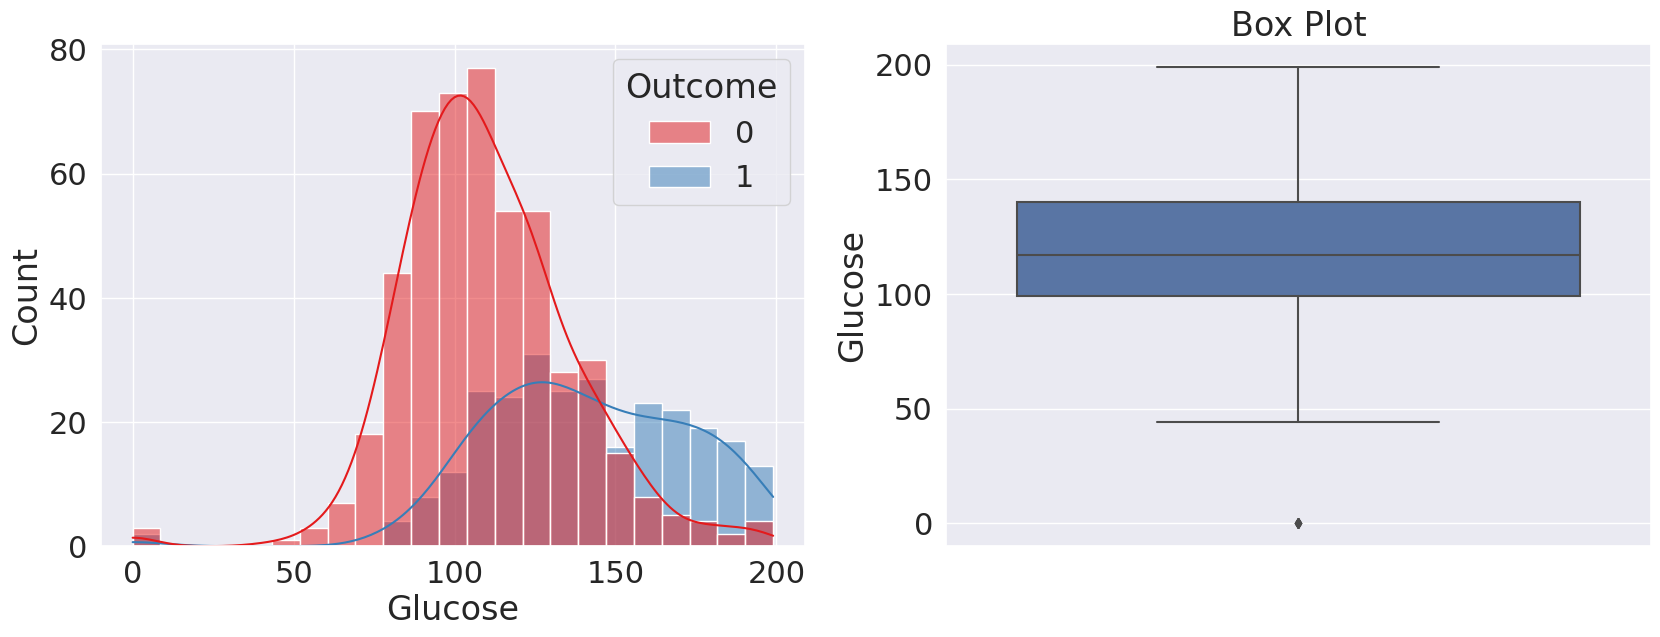

In [ ]:
#Glucose
plt.subplot(4,2,1)
sns.histplot(data=df, x='Glucose', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["Glucose"])

<Axes: title={'center': 'Box Plot'}, ylabel='BloodPressure'>

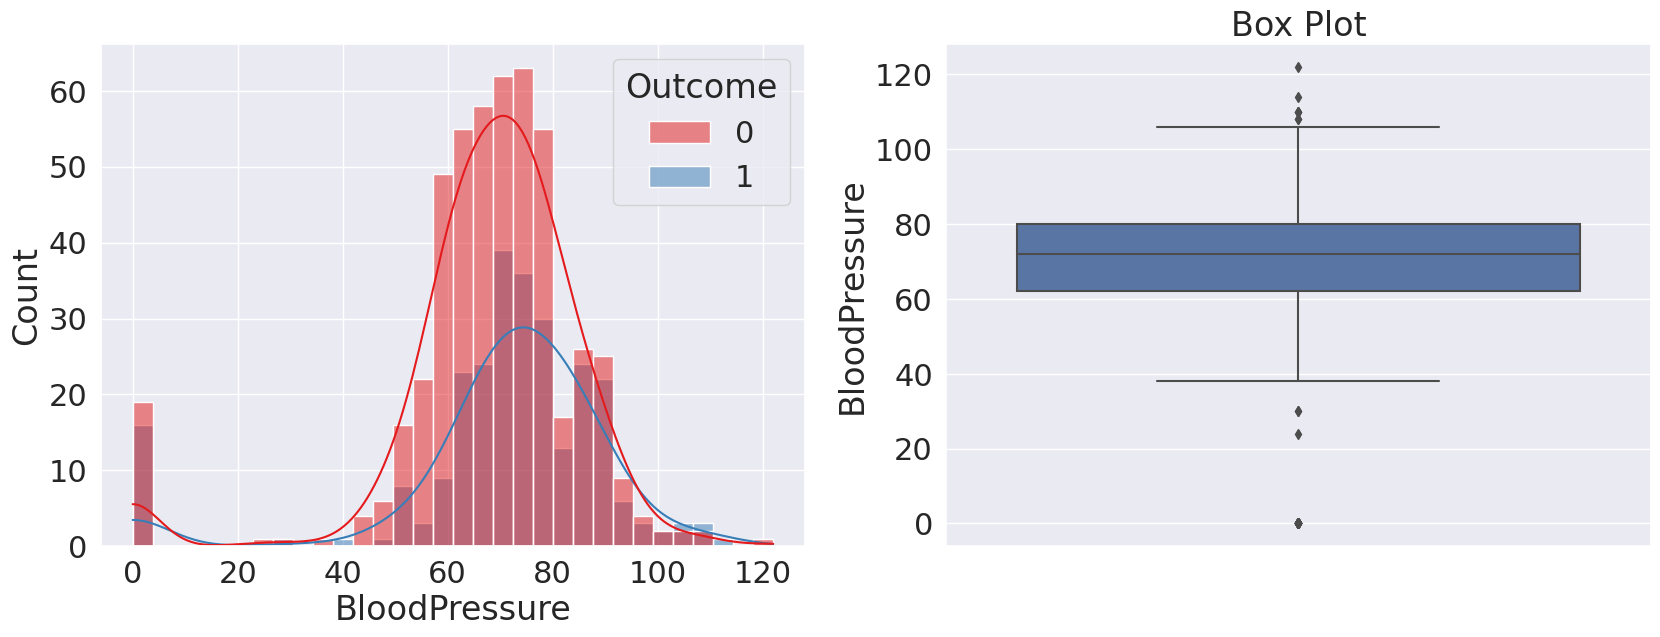

In [ ]:
#BloodPressure
plt.subplot(4,2,1)
sns.histplot(data=df, x='BloodPressure', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["BloodPressure"])

<Axes: title={'center': 'Box Plot'}, ylabel='SkinThickness'>

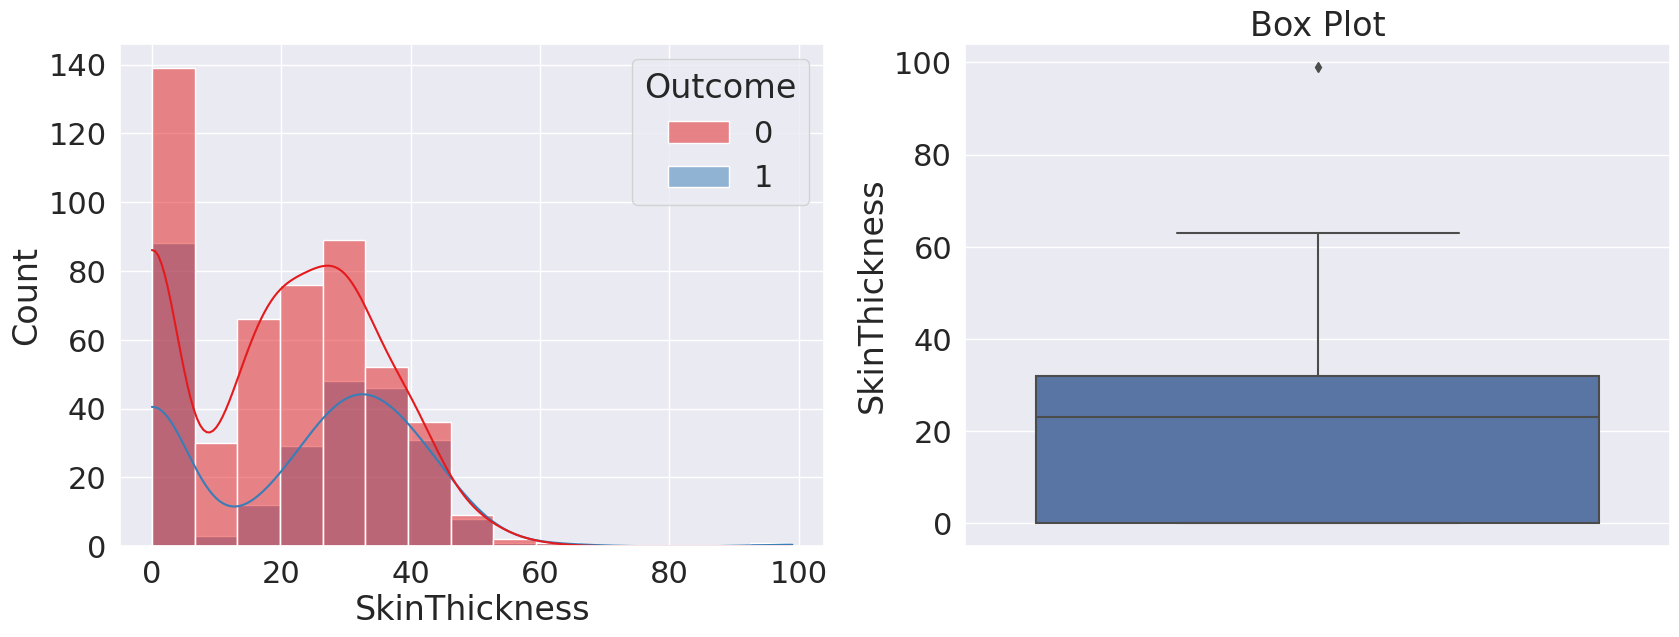

In [ ]:
#SkinThickness
plt.subplot(4,2,1)
sns.histplot(data=df, x='SkinThickness', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["SkinThickness"])

<Axes: title={'center': 'Box Plot'}, ylabel='Insulin'>

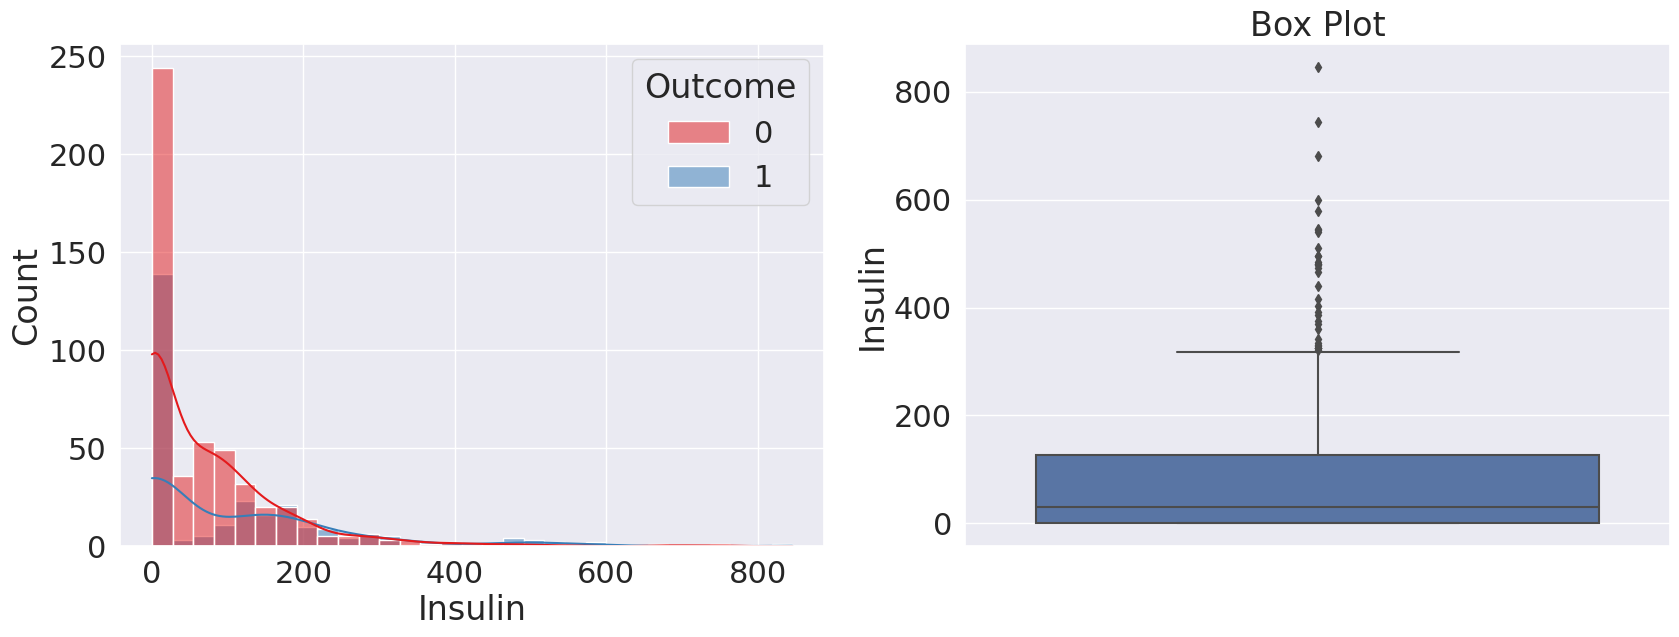

In [ ]:
#Insulin
plt.subplot(4,2,1)
sns.histplot(data=df, x='Insulin', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["Insulin"])

<Axes: title={'center': 'Box Plot'}, ylabel='BMI'>

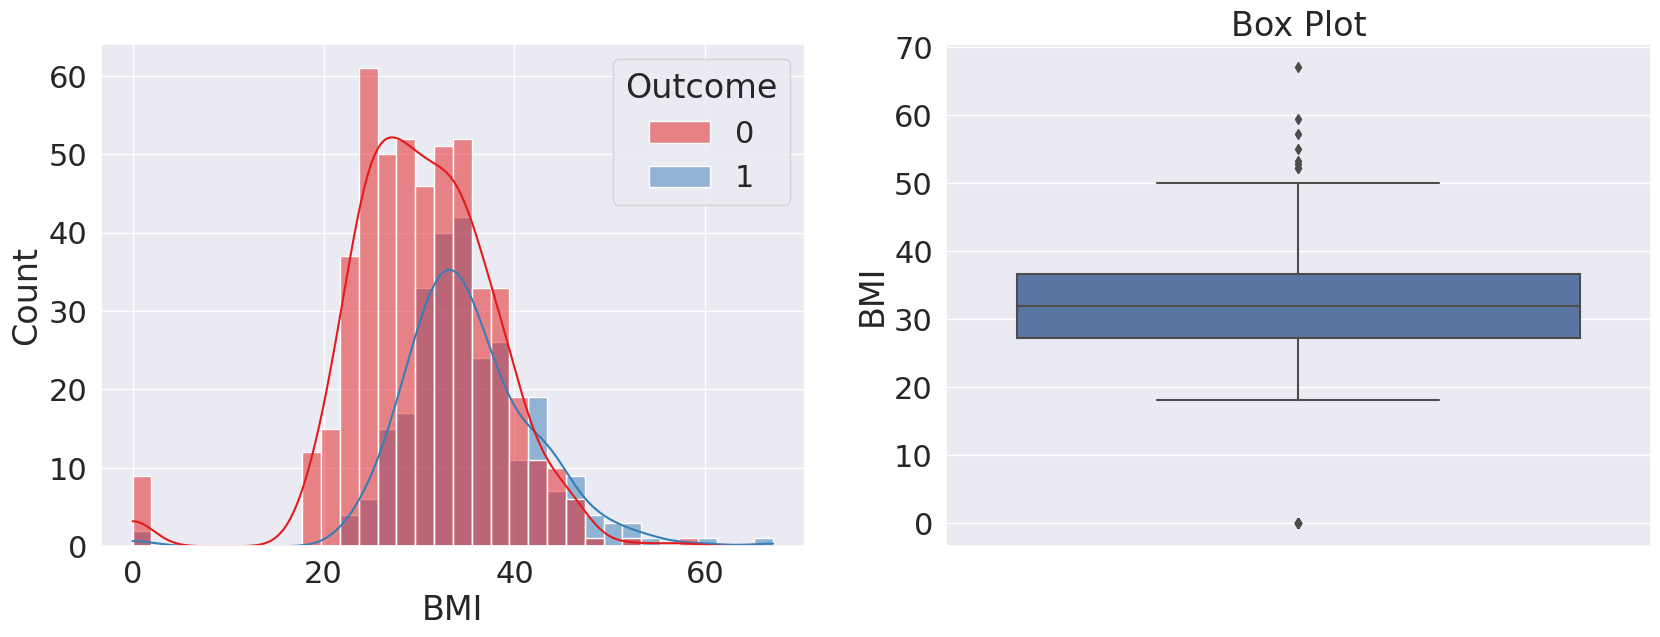

In [ ]:
#BMI
plt.subplot(4,2,1)
sns.histplot(data=df, x='BMI', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["BMI"])

<Axes: title={'center': 'Box Plot'}, ylabel='DiabetesPedigreeFunction'>

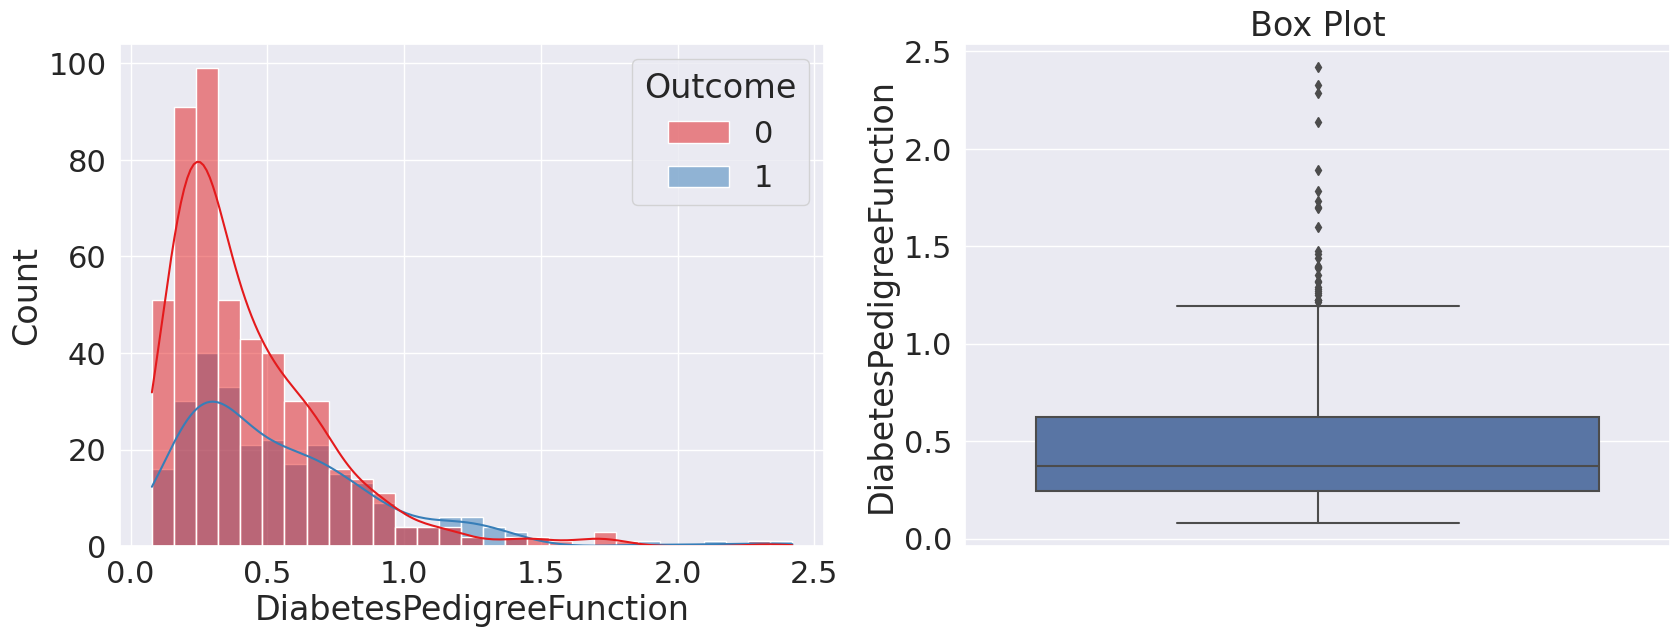

In [ ]:
#DiabetesPedigreeFunction
plt.subplot(4,2,1)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["DiabetesPedigreeFunction"])

<Axes: title={'center': 'Box Plot'}, ylabel='Age'>

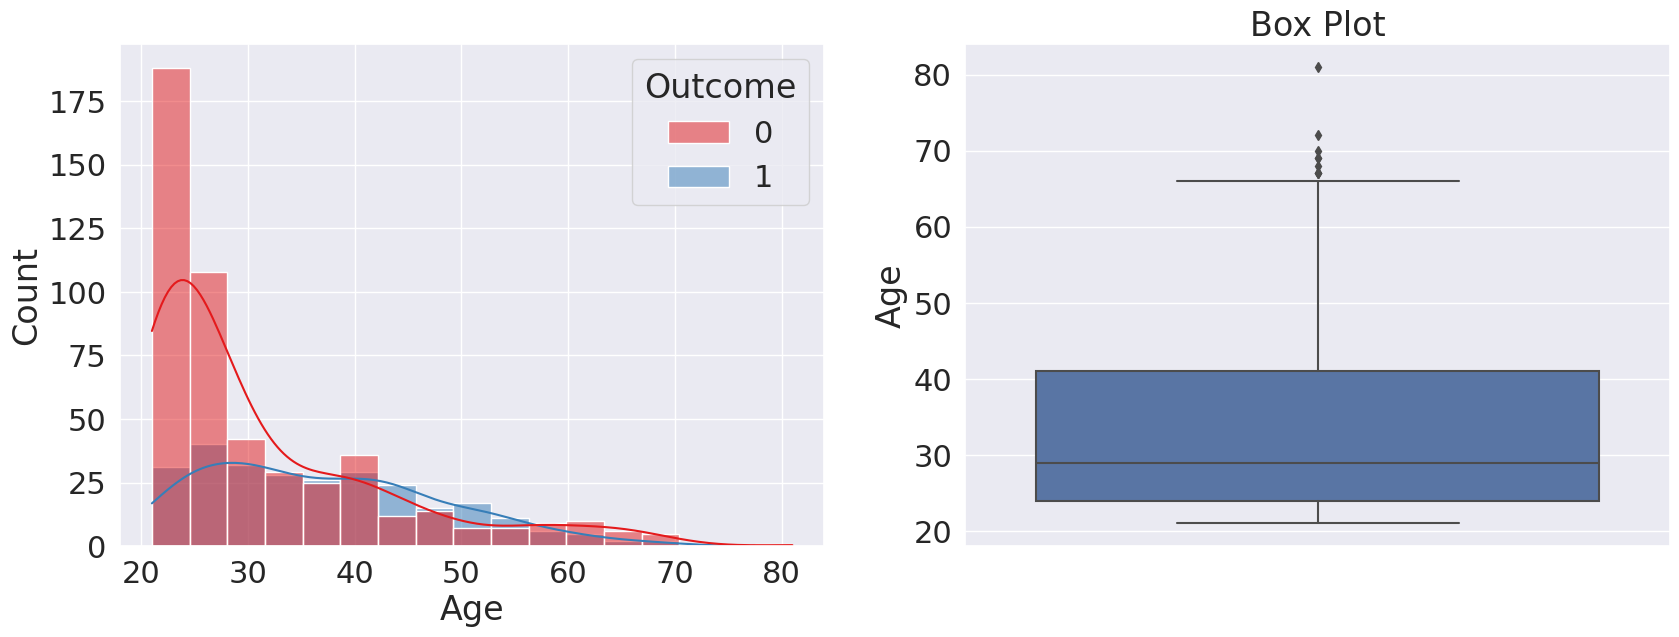

In [ ]:
#Age
plt.subplot(4,2,1)
sns.histplot(data=df, x='Age', hue="Outcome",kde=True, palette="Set1")
plt.subplot(4,2,2)
plt.title('Box Plot')
sns.boxplot(y=df["Age"])

##Preprocess

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'diabetes_df' with 'Outcome' as the target feature
# Replace this with your actual dataset and column names
# diabetes_df = ...

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the whole dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame (optional)
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)

df = resampled_df

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # report
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')  # the number of categorical variables
    print(f'num_cols: {len(num_cols)}')  # the number of numerical variables
    print(f'cat_but_car: {len(cat_but_car)}')  # the number of cardinal variables
    print(f'num_but_cat: {len(num_but_cat)}')  # the number of categorical variables that looks numerical
    return cat_cols, num_cols, cat_but_car


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1000
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
for i in df.columns:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(df,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (36.00, 212.00)
Thresholds of BloodPressure : (40.00, 104.00)
Thresholds of SkinThickness : (-49.50, 82.50)
Thresholds of Insulin : (-210.00, 350.00)
Thresholds of BMI : (15.26, 49.90)
Thresholds of DiabetesPedigreeFunction : (-0.34, 1.26)
Thresholds of Age : (1.00, 65.00)
Thresholds of Outcome : (-1.50, 2.50)


In [ ]:
# Observe the outliers, it can be functioned as well, but we don't need here
low, up = outlier_thresholds(df, "Pregnancies")
df[((df["Pregnancies"] < low) | (df["Pregnancies"] > up))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [ ]:
num_cols_miss = [i for i in num_cols if i != "Pregnancies"]
for i in num_cols_miss:
    df[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [ ]:
# Thay thế giá trị 0 bằng NaN
dataset = df
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [ ]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)

               n_miss  ratio
Insulin           488   48.8
SkinThickness     295   29.5
BloodPressure      51    5.1
BMI                11    1.1
Glucose             5    0.5


In [ ]:
df_ml = df.copy()

In [ ]:
scaler = MinMaxScaler()
df_ml = pd.DataFrame(scaler.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.326316,NaN,0.428156,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.263158,NaN,0.308666,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.252335,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.200000,0.110059,0.334271,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.326316,0.197633,0.590320,0.943638,0.200000,1.0


In [ ]:
# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_ml = pd.DataFrame(imputer.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.326316,0.320473,0.428156,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.263158,0.059408,0.308666,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.338947,0.271243,0.252335,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.200000,0.110059,0.334271,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.326316,0.197633,0.590320,0.943638,0.200000,1.0


In [ ]:
df_ml = pd.DataFrame(scaler.inverse_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,271.8,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,51.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,36.2,230.2,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
na_cols = missing_values_table(df, na_name=True) # columns that includes missing values
n_miss = df[na_cols].isnull().sum() # number of missing values on variables

# 100 as a threshold, it is open to comment
na_cols_ml = [i for i in n_miss.index]
print("Columns that will be applied ML model:", na_cols_ml)

               n_miss  ratio
Insulin           488   48.8
SkinThickness     295   29.5
BloodPressure      51    5.1
BMI                11    1.1
Glucose             5    0.5
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [ ]:
scaler = MinMaxScaler()

# take only needed columns
df[na_cols_ml] = pd.DataFrame(scaler.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[na_cols_ml] = pd.DataFrame(imputer.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

# from standardized to non-standardized
df[na_cols_ml] = pd.DataFrame(scaler.inverse_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

    Glucose  BloodPressure  SkinThickness   Insulin       BMI
0  0.670968       0.489796       0.326316       NaN  0.428156
1  0.264516       0.428571       0.263158       NaN  0.308666
2  0.896774       0.408163            NaN       NaN  0.252335
3  0.290323       0.428571       0.200000  0.110059  0.334271
4  0.600000       0.163265       0.326316  0.197633  0.590320
    Glucose  BloodPressure  SkinThickness   Insulin       BMI
0  0.670968       0.489796       0.326316  0.251834  0.428156
1  0.264516       0.428571       0.263158  0.084024  0.308666
2  0.896774       0.408163       0.261053  0.508402  0.252335
3  0.290323       0.428571       0.200000  0.110059  0.334271
4  0.600000       0.163265       0.326316  0.197633  0.590320
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0    213.8  33.6
1     85.0           66.0           29.0     72.0  26.6
2    183.0           64.0           28.8    430.6  23.3
3     89.0           66.0       

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# LOF
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)  # returns LOF scores
df_scores = clf.negative_outlier_factor_ # keep scores to observe (negative)
# df_scores = -df_scores # for changing to pozitive but we will use as negative
print(df_scores[0:5])
print(np.sort(df_scores)[0:5])

[-1.043 -1.003 -1.038 -1.001 -1.261]
[-3.78  -2.765 -2.292 -2.168 -2.162]


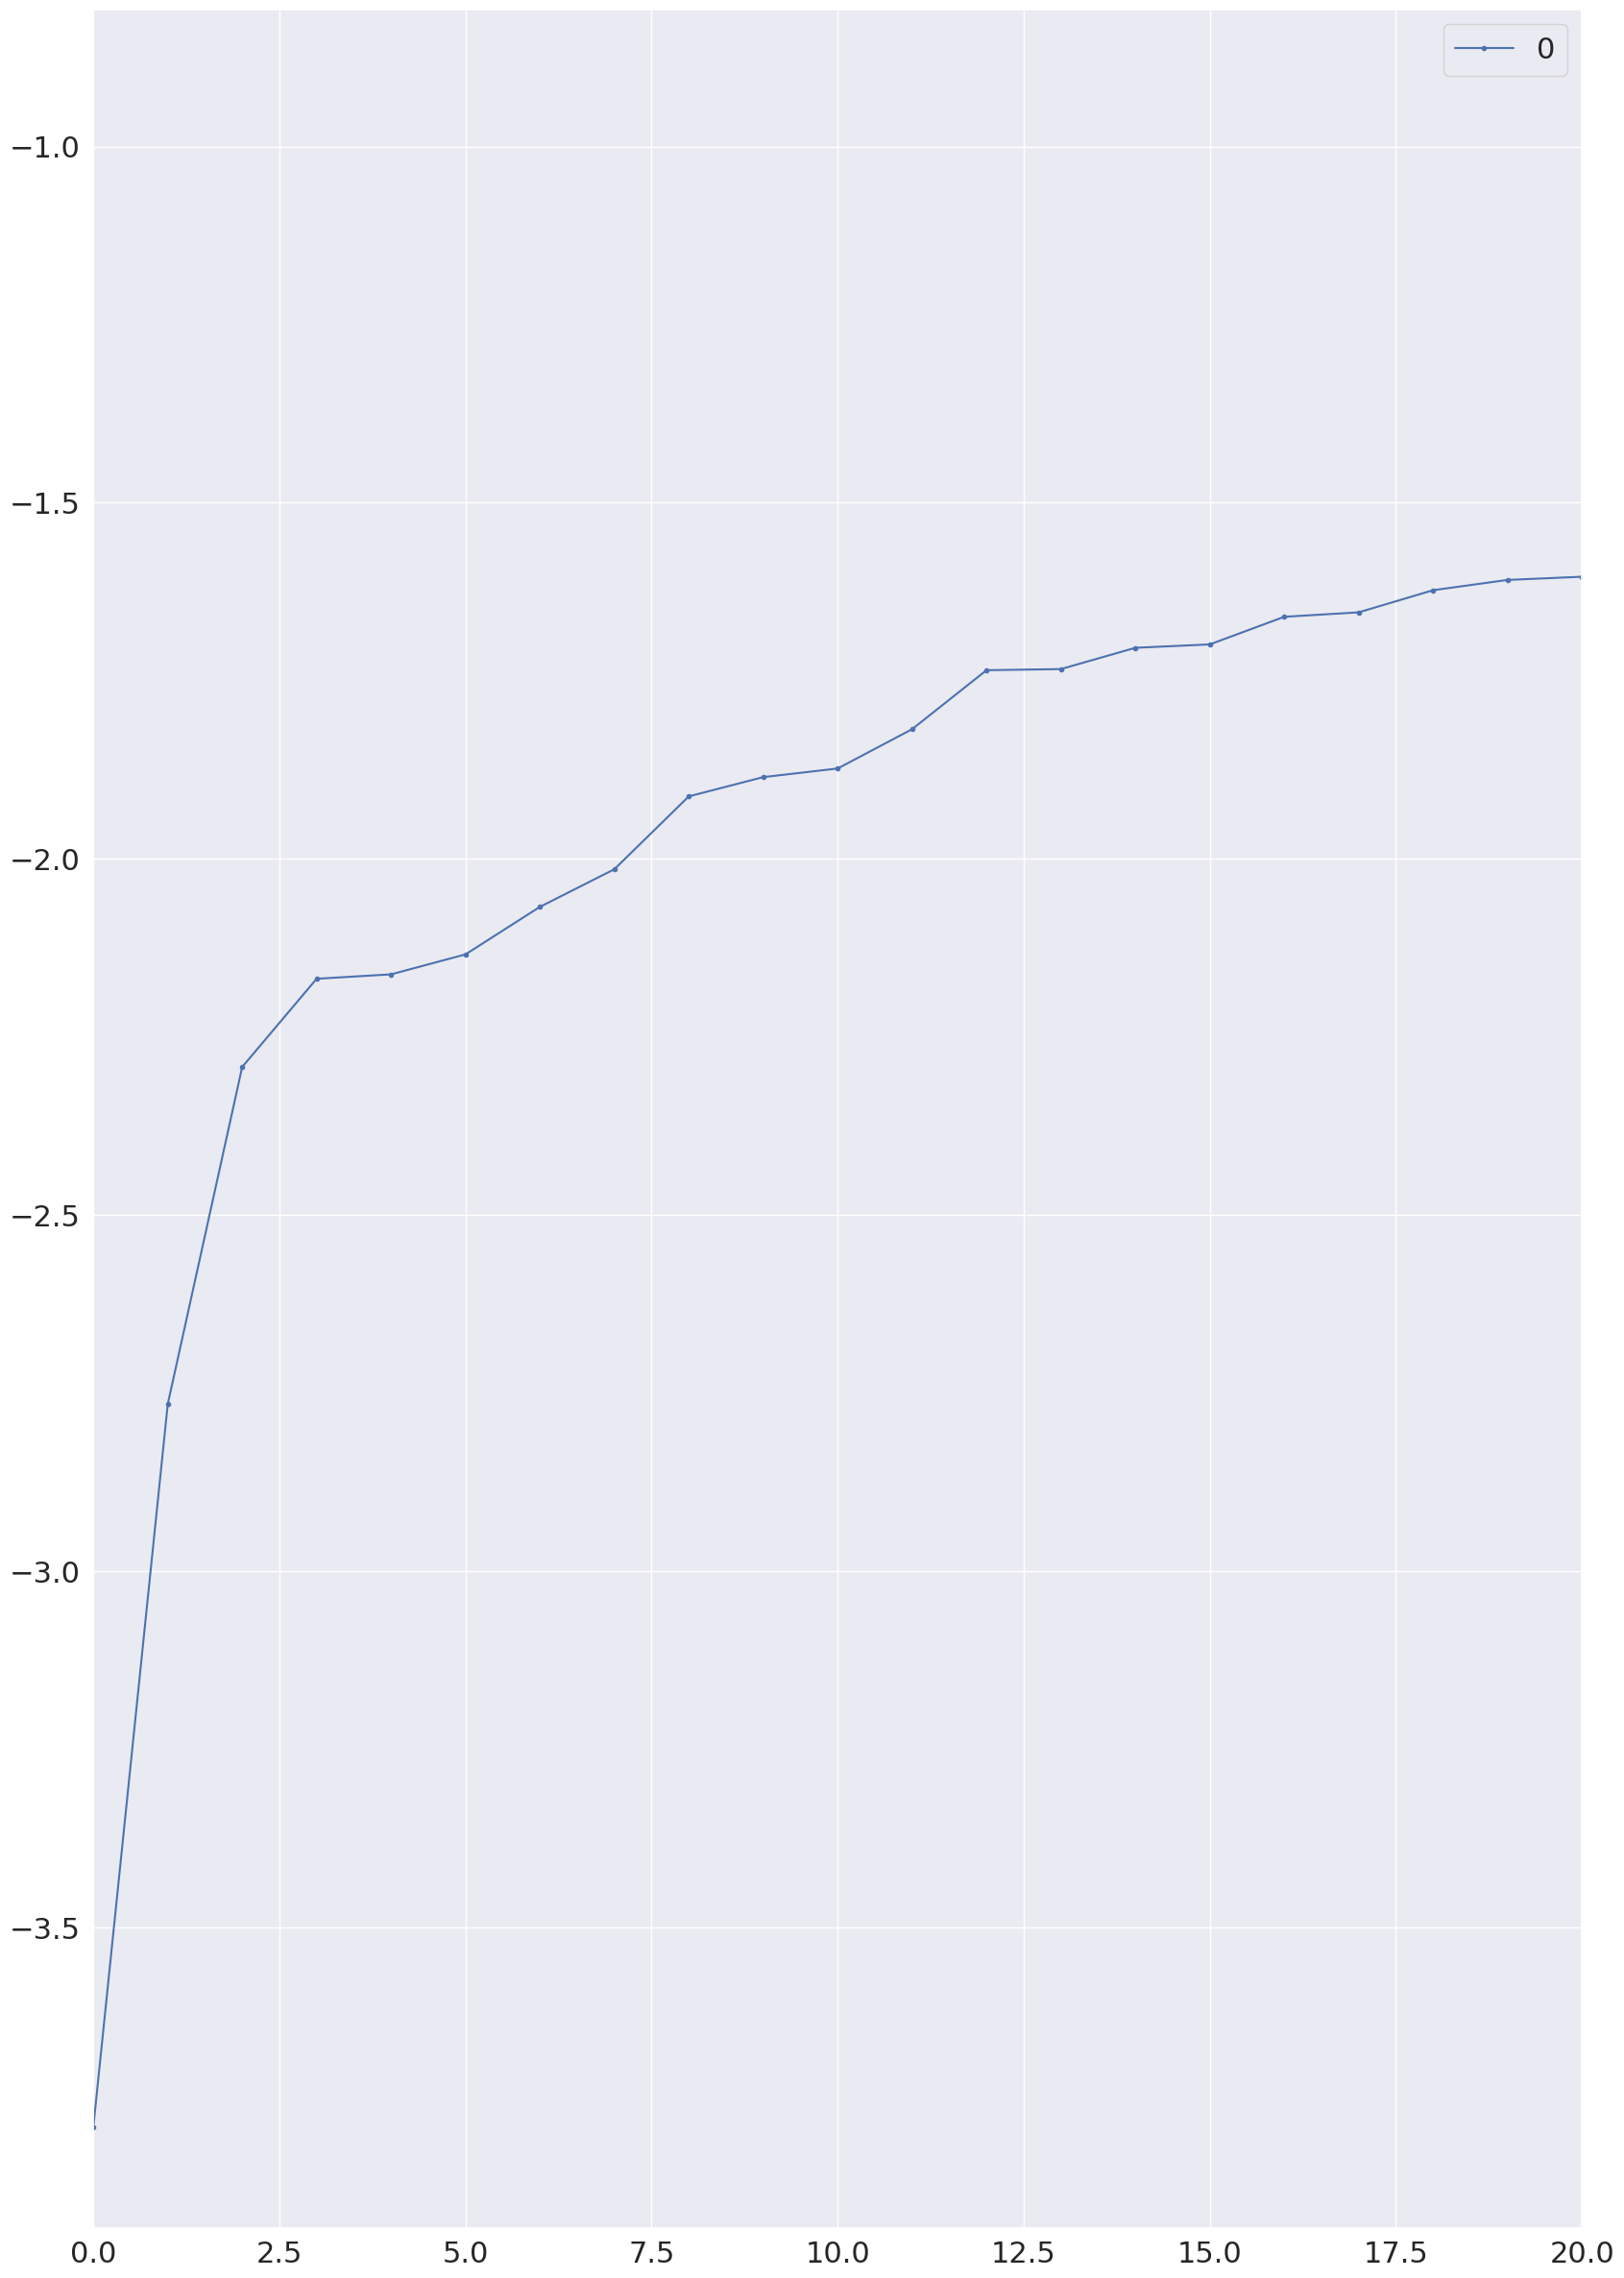

In [ ]:
# elbow method
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')  # x=gözlemler, y=outlier skorları
plt.show()

In [ ]:
th = np.sort(df_scores)[3]  # set any lower scores than that as outlier
df[df_scores < th] # check outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.100000,0.39800,59.0,1
228,4,197.0,70.0,39.0,744.0,36.700000,2.32900,31.0,0
839,0,185.0,75.0,74.0,9.0,51.277245,1.81326,37.0,1


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1000
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,213.8,33.600000,0.627000,50.0,1
1,1,85.0,66.0,29.0,72.0,26.600000,0.351000,31.0,0
2,8,183.0,64.0,28.8,430.6,23.300000,0.672000,32.0,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167000,21.0,0
4,0,137.0,40.0,35.0,168.0,43.100000,2.288000,33.0,1
...,...,...,...,...,...,...,...,...,...
995,5,164.0,64.0,27.6,274.8,31.906102,0.233595,39.0,1
996,5,107.0,69.0,31.0,207.4,35.752773,0.278394,28.0,1
997,4,171.0,83.0,27.0,154.0,33.300000,1.196333,51.0,1
998,8,111.0,81.0,32.0,175.0,34.173097,0.284266,35.0,1


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1000.0,3.910000,3.274389,0.000000,1.000,3.0000,6.000000,13.500000
Glucose,1000.0,126.024800,30.823078,44.000000,103.000,122.0000,146.000000,199.000000
BloodPressure,1000.0,72.787600,11.340885,42.500000,65.000,73.0000,80.000000,102.500000
SkinThickness,1000.0,29.046400,9.064560,4.000000,22.600,29.0000,35.000000,53.600000
Insulin,1000.0,153.905000,80.857919,1.000000,94.000,134.9000,196.100000,349.250000
BMI,1000.0,32.997616,6.472267,15.562142,28.400,32.8000,36.958572,49.796429
DiabetesPedigreeFunction,1000.0,0.486584,0.295142,0.078000,0.256,0.4055,0.656173,1.256432
Age,1000.0,33.917000,11.162738,21.000000,25.000,31.0000,41.000000,65.000000
Outcome,1000.0,0.500000,0.500250,0.000000,0.000,0.5000,1.000000,1.000000


In [ ]:
#Chuẩn hóa z-score
ss = StandardScaler()
for i in num_cols:
    df[i] = ss.fit_transform(df[[i]])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.638606,0.713303,-0.069483,0.657128,0.741114,0.093118,0.475994,1.441496,1
1,-0.889160,-1.331643,-0.598807,-0.005121,-1.013456,-0.988961,-0.459616,-0.261447,0
2,1.249713,1.849384,-0.775248,-0.027196,2.417113,-1.499083,0.628539,-0.171818,1
3,-0.889160,-1.201805,-0.598807,-0.667371,-0.741238,-0.757087,-1.083356,-1.157732,0
4,-1.194714,0.356249,-2.671992,0.657128,0.174405,1.561654,2.609699,-0.082189,1


In [ ]:
feature_names = [cname for cname in df.loc[:,:'Age'].columns]

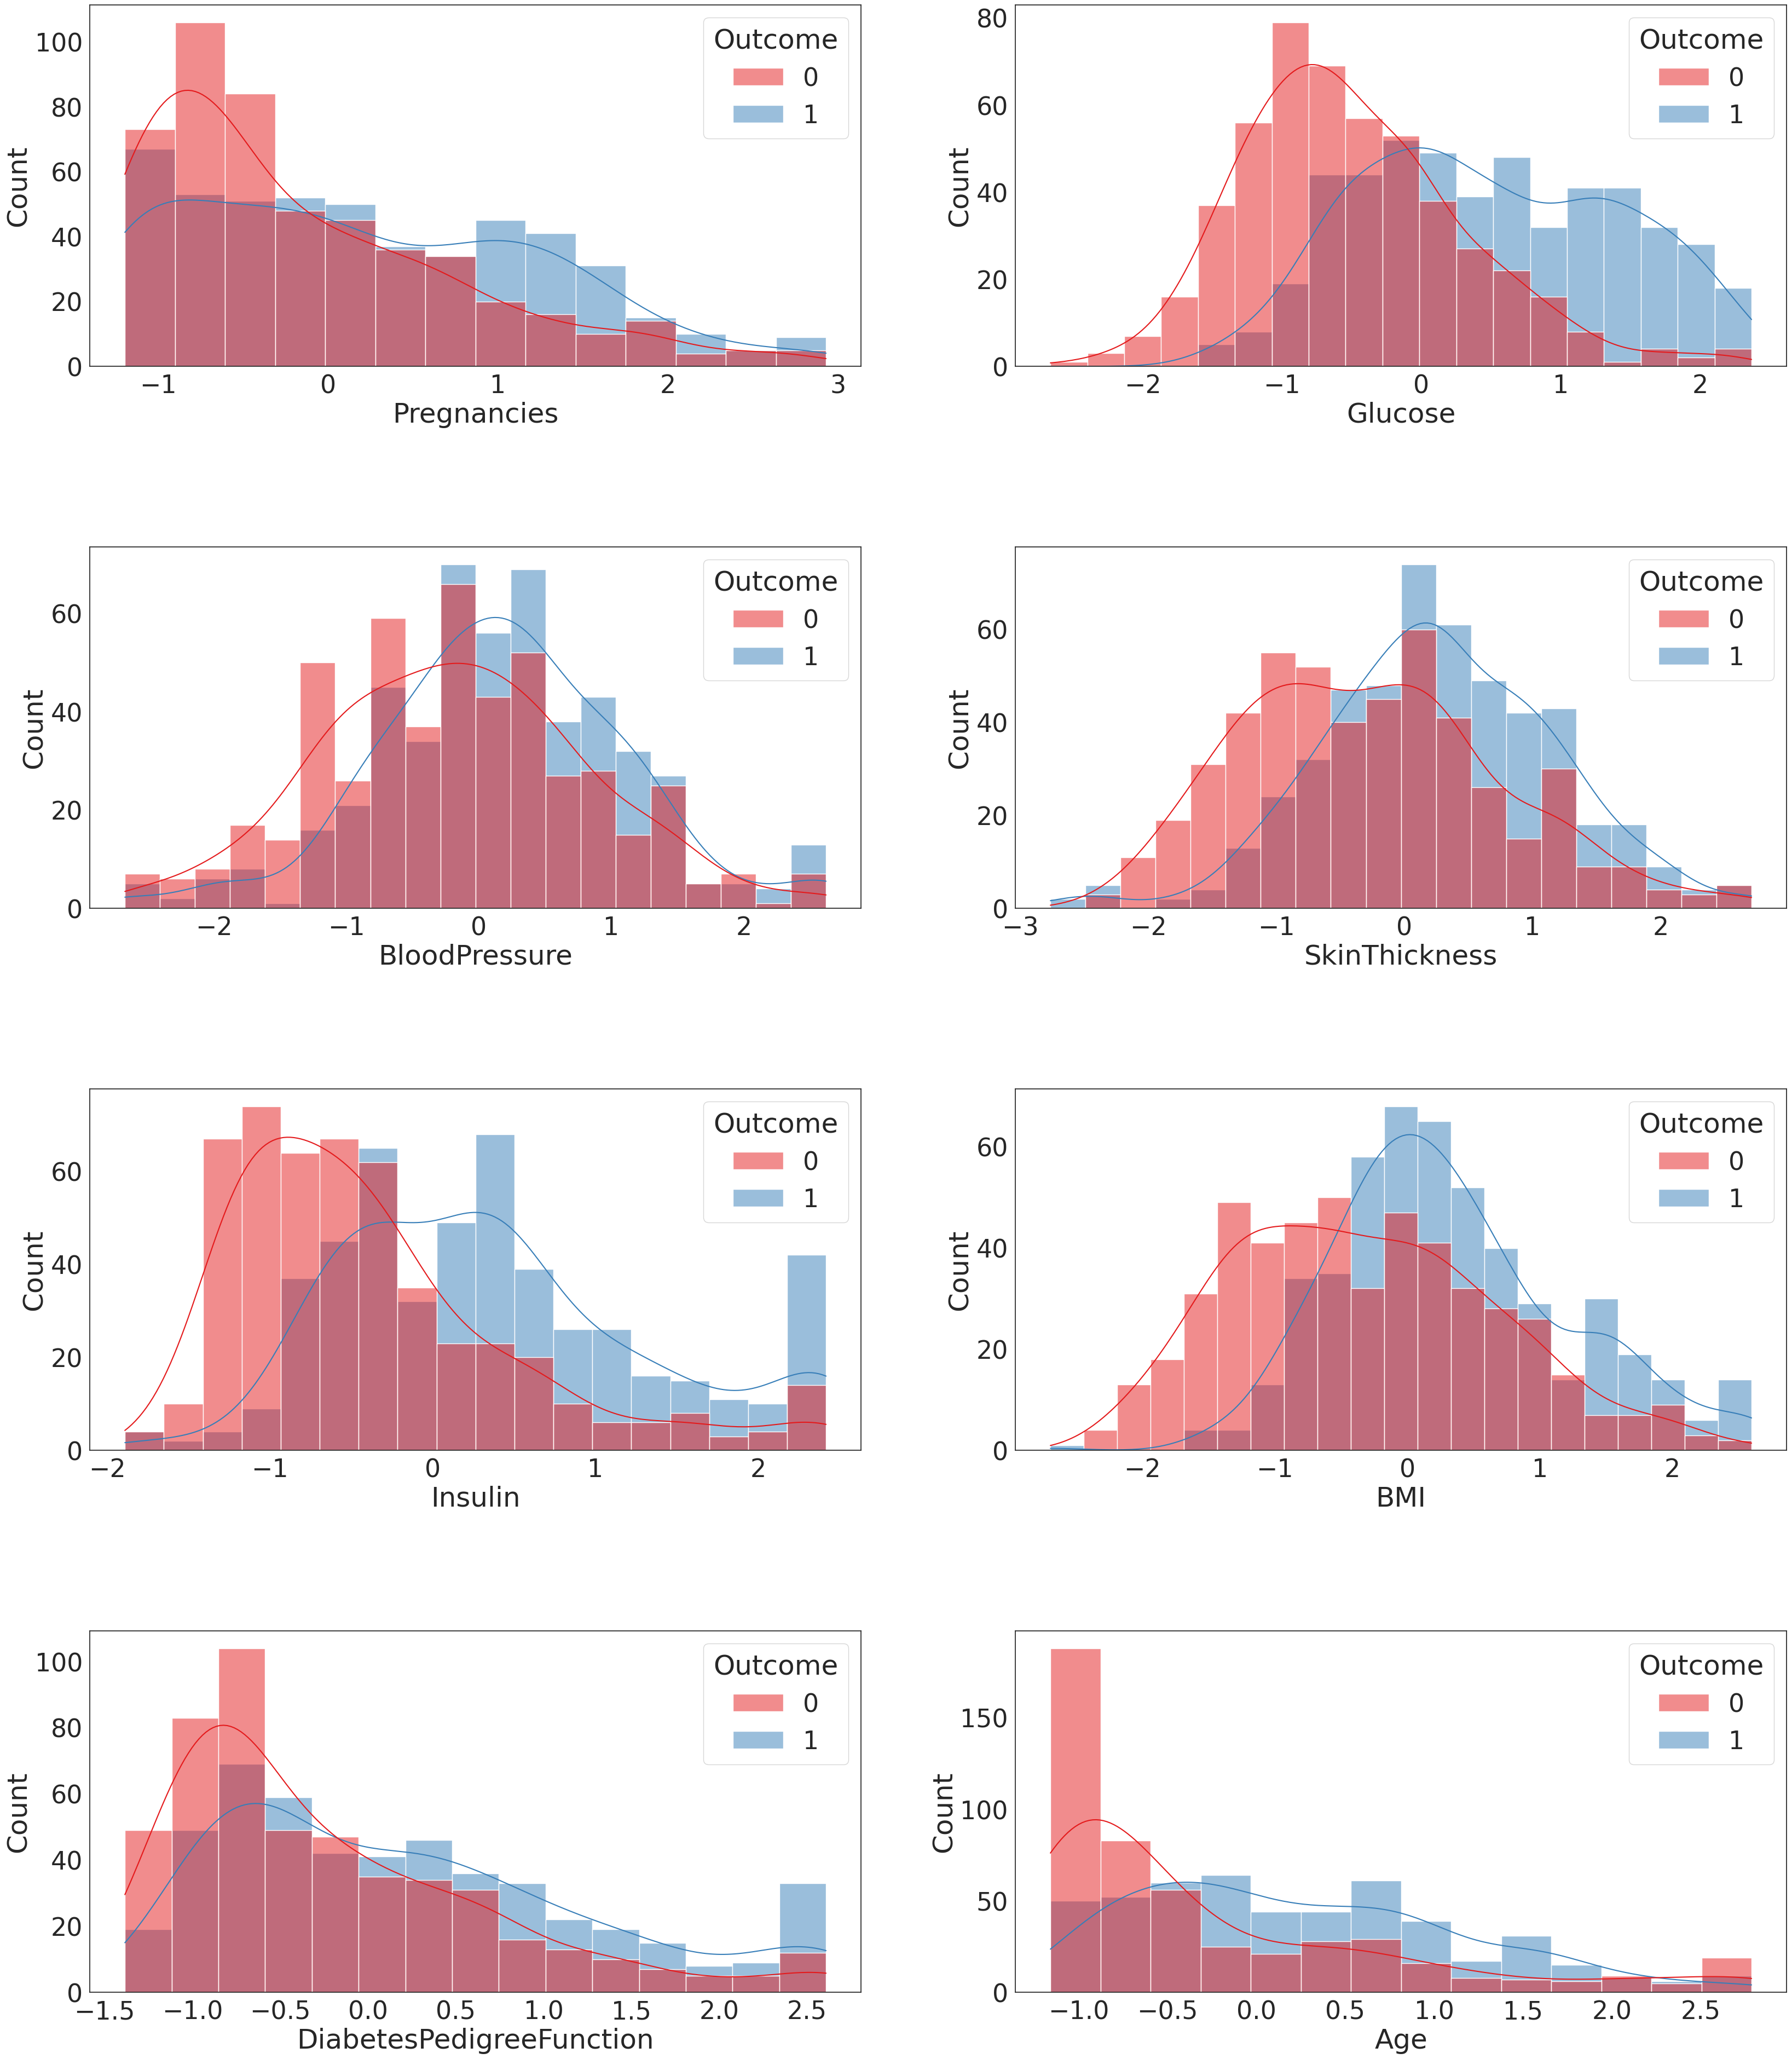

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True,palette="Set1")
    i = i + 1

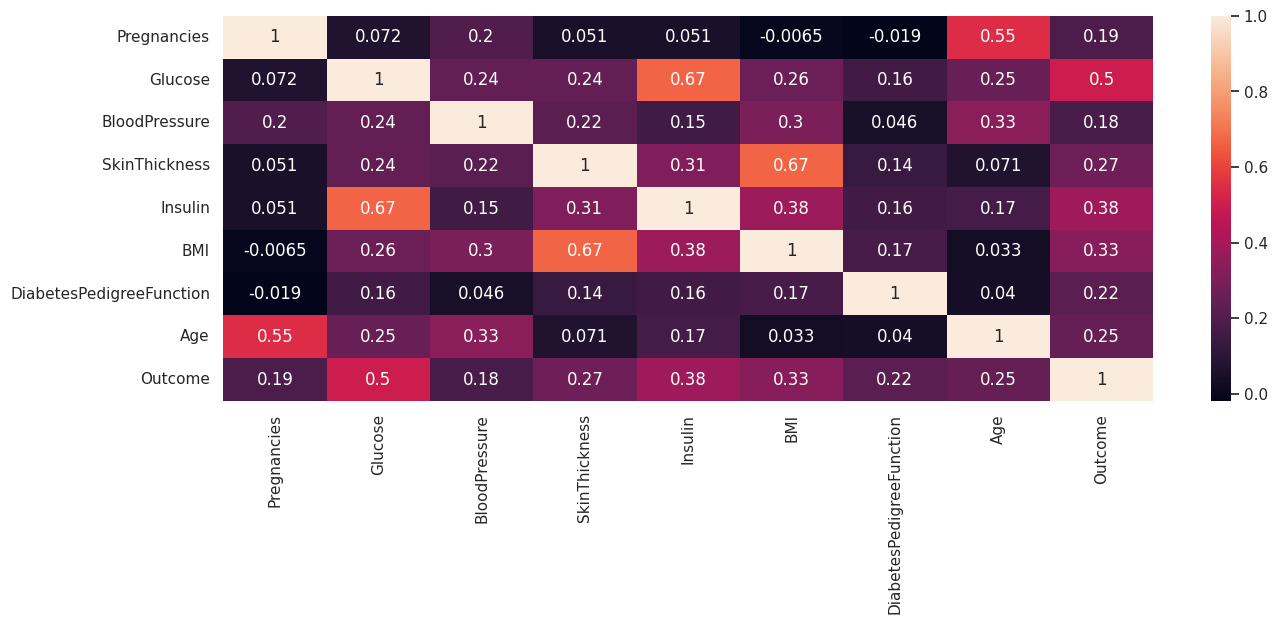

In [ ]:
# Heatmap
rcParams['figure.figsize'] = 10,20
plt.figure(figsize=(15,5))
sns.set(font_scale = 1)
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1000.0,-6.750156e-17,1.00050,-1.194714,-0.889160,-0.278054,0.638606,2.930256
Glucose,1000.0,1.065814e-16,1.00050,-2.662480,-0.747372,-0.130643,0.648384,2.368735
BloodPressure,1000.0,4.263256e-16,1.00050,-2.671992,-0.687027,0.018738,0.636283,2.621248
SkinThickness,1000.0,-2.167155e-16,1.00050,-2.764495,-0.711521,-0.005121,0.657128,2.710102
Insulin,1000.0,-7.105427e-18,1.00050,-1.891979,-0.741238,-0.235160,0.522102,2.417113
BMI,1000.0,3.765876e-16,1.00050,-2.695222,-0.710712,-0.030548,0.612295,2.596806
DiabetesPedigreeFunction,1000.0,-1.136868e-16,1.00050,-1.385056,-0.781655,-0.274867,0.574886,2.609699
Age,1000.0,-1.421085e-16,1.00050,-1.157732,-0.799218,-0.261447,0.634839,2.785925
Outcome,1000.0,5.000000e-01,0.50025,0.000000,0.000000,0.500000,1.000000,1.000000


#Chia Du Lieu

In [ ]:
y = dataset['Outcome']
X = dataset.drop('Outcome', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y )
print(f"Shape of X_train - {X_train.shape}")
print(f"Shape of y_train - {y_train.shape}")
print(f"Shape of X_test- {X_test.shape}")
print(f"Shape of y_test - {y_test.shape}")

Shape of X_train - (700, 8)
Shape of y_train - (700,)
Shape of X_test- (300, 8)
Shape of y_test - (300,)


In [ ]:
# Mở rộng tập dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **MÔ HÌNH**


## **DECISION TREE**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Xác định lưới tham số để tìm kiếm
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Tạo Trình phân loại cây quyết định
dt_classifier = DecisionTreeClassifier(random_state=42)

# Tạo Tìm kiếm lưới với xác thực chéo 5 lần
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Điều chỉnh tìm kiếm dạng lưới cho phù hợp với dữ liệu
grid_search.fit(X_train, y_train)

# Nhận các thông số tốt nhất và công cụ ước tính tốt nhất
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Phù hợp với bộ phân loại tốt nhất trên tập huấn luyện đầy đủ
best_dt_classifier.fit(X_train, y_train)

# Đưa ra dự đoán trên tập huấn luyện
y_train_pred = best_dt_classifier.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
train_accuracy_dt = accuracy_score(y_train, y_train_pred)

# Đưa ra dự đoán trên tập test
y_pred = best_dt_classifier.predict(X_test)

# Đánh giá mô hình trên tập test
test_accuracy_dt = accuracy_score(y_test, y_pred)

# In kết quả
print(f'Best Parameters: {best_params}')
print("Accuracy Test:", round(test_accuracy_dt, 2))
print("Accuracy Train:", round(train_accuracy_dt, 2))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Test: 0.81
Accuracy Train: 0.85


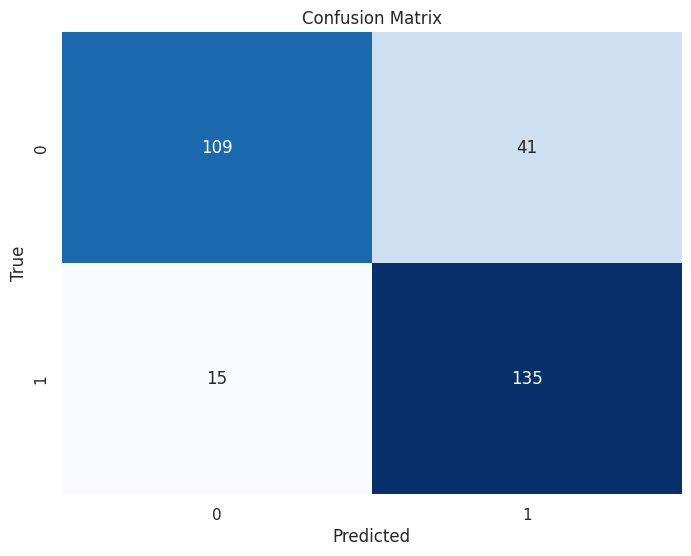

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       150
           1       0.77      0.90      0.83       150

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [ ]:
# Tính toán ma trận confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận confusion matrix dưới dạng bản đồ nhiệt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Báo cáo phân loại hiển thị
print("Classification Report:")
print(classification_report(y_test, y_pred))



## **RANDOM FOREST**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Tạo một Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Xác định lưới siêu tham số để tìm kiếm
param_grid = {
    'n_estimators': [20, 50, 100, 200],  # Số cây
    'max_depth': [None, 10, 20, 30],    # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],   # Số lượng mẫu tối thiểu cần thiết để phân chia một nút nội bộ
    'min_samples_leaf': [1, 2, 4]      # Số lượng mẫu tối thiểu cần có ở một nút lá
}

# Tạo đối tượng GridSearchCV với xác thực chéo
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Điều chỉnh tìm kiếm dạng lưới cho phù hợp với dữ liệu
grid_search.fit(X_train, y_train)

# Nhận siêu tham số tốt nhất và công cụ ước tính tốt nhất
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Phù hợp với bộ phân loại tốt nhất trên tập huấn luyện đầy đủ
best_rf_classifier.fit(X_train, y_train)

# Đưa ra dự đoán trên tập huấn luyện
y_train_pred = best_rf_classifier.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
train_accuracy_rf = accuracy_score(y_train, y_train_pred)

# Đưa ra dự đoán trên tập kiểm tra
y_pred = best_rf_classifier.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
test_accuracy_rf = accuracy_score(y_test, y_pred)

# In các tham số tốt nhất, điểm chính xác tương ứng và độ chính xác của chúng trên tập huấn luyện
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", round(test_accuracy_rf, 2))
print("Accuracy on Train Data:", round(train_accuracy_rf, 2))


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy on Test Data: 0.82
Accuracy on Train Data: 0.99


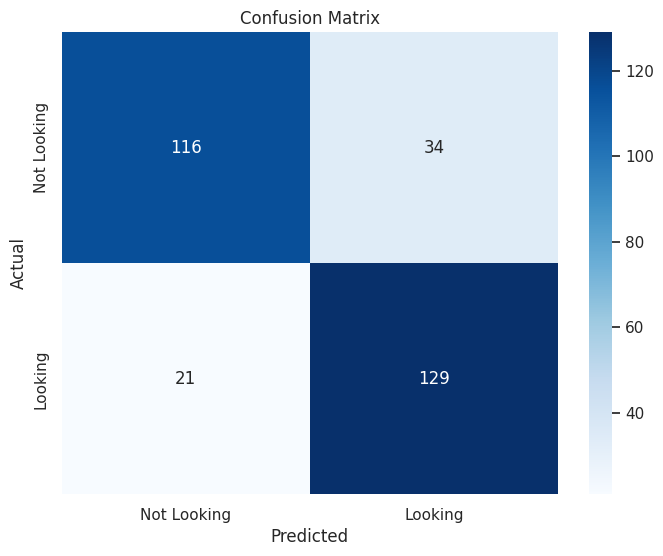

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       150
           1       0.79      0.86      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
# Plotting Confusion Matrix (Heatmap)
plt.figure(figsize=(8, 6))  # Set the figure size
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Looking', 'Looking'], yticklabels=['Not Looking', 'Looking'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Báo cáo phân loại hiển thị
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

## **Logistic Regression**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Tạo một mô hình Logistic Regression
logistic_regression = LogisticRegression()

# Xác định lưới siêu tham số để tìm kiếm
param_grid = {
    'penalty': ['l2'],  # Chỉ sử dụng lựa chọn 'l2'
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver algorithm
}

# Tạo đối tượng GridSearchCV với xác thực chéo
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Điều chỉnh tìm kiếm dạng lưới cho phù hợp với dữ liệu
grid_search.fit(X_train, y_train)

# Nhận siêu tham số tốt nhất và công cụ ước tính tốt nhất
best_params = grid_search.best_params_
best_logistic_regression = grid_search.best_estimator_

# Phù hợp với mô hình tốt nhất trên tập huấn luyện đầy đủ
best_logistic_regression.fit(X_train, y_train)

# Đưa ra dự đoán trên tập huấn luyện
y_train_pred = best_logistic_regression.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
train_accuracy_lr = accuracy_score(y_train, y_train_pred)

# Đưa ra dự đoán trên tập kiểm tra
y_test_pred = best_logistic_regression.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
test_accuracy_lr = accuracy_score(y_test, y_test_pred)

# In các tham số tốt nhất, điểm chính xác tương ứng và độ chính xác của chúng trên tập huấn luyện và tập kiểm tra
print("Best Hyperparameters:", best_params)
print("Accuracy Test:", round(test_accuracy_lr, 2))
print("Accuracy Train:", round(train_accuracy_lr, 2))



Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Test: 0.76
Accuracy Train: 0.74


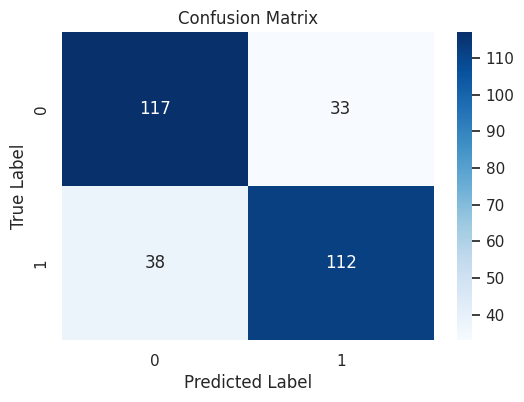

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       150
           1       0.77      0.75      0.76       150

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [ ]:
# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Vẽ heatmap cho ma trận nhầm lẫn với kích thước nhỏ
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# In báo cáo phân loại
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)


## **KNN**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Create Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Fit the best classifier on the full training set
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_knn_classifier.predict(X_train)

# Evaluate the model on the training set
train_accuracy_knn = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = best_knn_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy_knn = accuracy_score(y_test, y_test_pred)

# Print the best parameters and accuracy on both training and test sets
print(f'Best Parameters: {best_params}')
print("Accuracy Test:", round(test_accuracy_knn, 2))
print("Accuracy Train:", round(train_accuracy_knn, 2))


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy Test: 0.81
Accuracy Train: 1.0


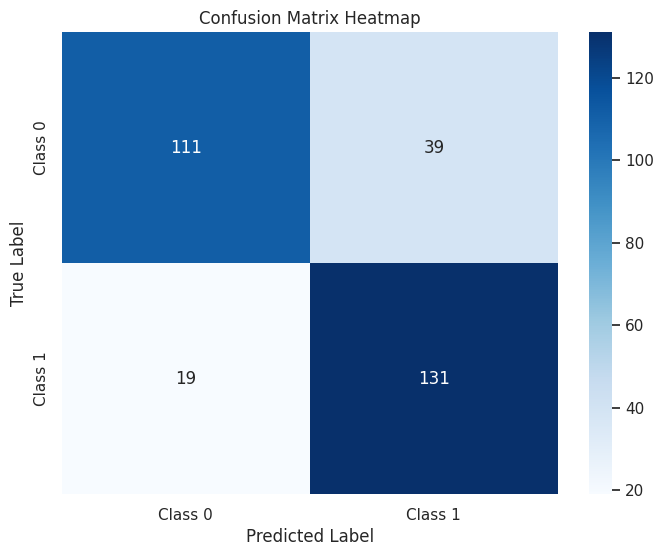

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       150
           1       0.77      0.87      0.82       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Heatmap for confusion matrix with adjusted size
plt.figure(figsize=(8, 6))  # Chỉnh kích thước ở đây
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)


## **NEURAL NETWORK**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature extraction using SelectKBest
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X_train, y_train)

# Transform the data
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(500, 500, 500, 500, 500), activation='relu', solver='adam', max_iter=10, random_state=1)
mlp.fit(X_train, y_train)

# Make Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate Accuracy
train_accuracy_nn = accuracy_score(y_train, y_train_pred)
test_accuracy_nn = accuracy_score(y_test, y_test_pred)

# Print Accuracy
print("Accuracy Test:", round(test_accuracy_nn, 2))
print("Accuracy Train:", round(train_accuracy_nn, 2))


Accuracy Test: 0.84
Accuracy Train: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


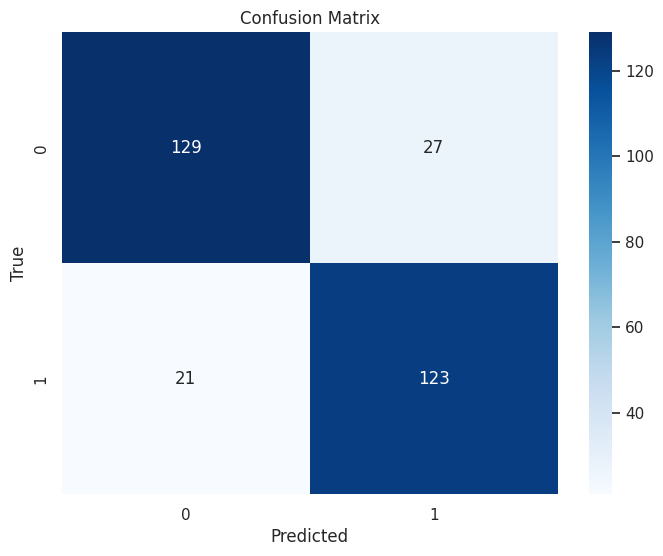

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       156
           1       0.82      0.85      0.84       144

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
# Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report on Test Data:\n', classification_report(y_test, y_test_pred))


## **Naive Bayes**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature extraction using SelectKBest
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X_train, y_train)

# Transform the data
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [50, 60, 70, 80, 90]  # Add more values if needed
}

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_nb_classifier = grid_search.best_estimator_

# Make Predictions
y_train_pred = best_nb_classifier.predict(X_train)
y_test_pred = best_nb_classifier.predict(X_test)

# Calculate Accuracy
train_accuracy_nb = accuracy_score(y_train, y_train_pred)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)

# Print Accuracy
print(f'Best Hyperparameters: {best_params}')
print("Accuracy Test:", round(test_accuracy_nb, 2))
print("Accuracy Train:", round(train_accuracy_nb, 2))


Best Hyperparameters: {'var_smoothing': 50}
Accuracy Test: 0.75
Accuracy Train: 0.72


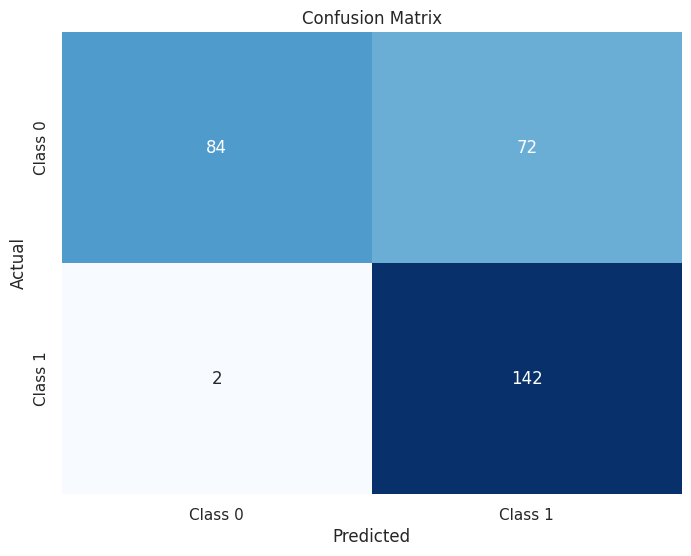

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.98      0.54      0.69       156
           1       0.66      0.99      0.79       144

    accuracy                           0.75       300
   macro avg       0.82      0.76      0.74       300
weighted avg       0.83      0.75      0.74       300



In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report on Test Data:\n', classification_report(y_test, y_test_pred))


# **ROC**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


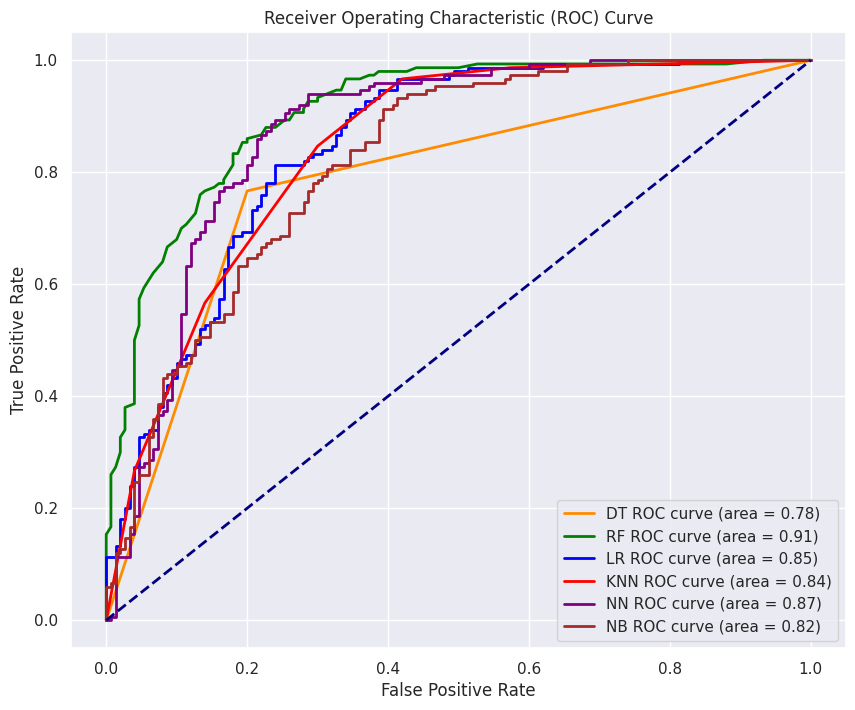

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_score_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_score_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_score_lr = lr_classifier.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_score_knn = knn_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(500, 500, 500, 500, 500), activation='relu', solver='adam', max_iter=10, random_state=1)
nn_classifier.fit(X_train, y_train)
y_score_nn = nn_classifier.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_score_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_score_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Vẽ đồ thị ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'DT ROC curve (area = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RF ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'LR ROC curve (area = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label=f'NN ROC curve (area = {roc_auc_nn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='brown', lw=2, label=f'NB ROC curve (area = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


đầu tiên chia dữ liệu thành tập huấn luyện và tập kiểm tra để đánh giá hiệu suất mô hình. Sau đó xây dựng các mô hình, dự đoán xác suất dương, tính FPR, TPR và diện tích dưới đường ROC (AUC).

roc_curve tính toán FPR, TPR và ngưỡng tương ứng cho mô hình. FPR (False Positive Rate) là tỷ lệ dương giả mạo, TPR (True Positive Rate) là tỷ lệ dương thật. Ngưỡng là giá trị xác suất để xác định giá trị FPR và TPR.
auc tính toán diện tích dưới đường ROC, một độ đo tổng quát của hiệu suất của mô hình. Nó là diện tích tích phía dưới đường ROC và là một con số giữa 0 và 1. Mô hình càng tốt nếu AUC càng gần 1.

=> Việc tính toán FPR, TPR và AUC giúp đánh giá hiệu suất của mô hình trong việc phân loại các mẫu thuộc lớp dương và lớp âm. Đồng thời, đường ROC cung cấp một cách trực quan để so sánh hiệu suất của mô hình với việc dự đoán ngẫu nhiên.

Giá trị AUC càng cao, mô hình càng tốt. Cụ thể:

AUC = 0.5: Mô hình không có khả năng phân loại tốt hơn so với dự đoán ngẫu nhiên.

0.5 < AUC < 1: Mô hình có khả năng phân loại tốt hơn dự đoán ngẫu nhiên. Độ lớn của AUC phản ánh mức độ cải thiện so với mô hình ngẫu nhiên.

AUC = 1: Mô hình hoàn hảo, tốt hơn mọi mô hình dự đoán ngẫu nhiên.

# **BẢNG ACCURACY CÁC MODEL**

In [ ]:
from tabulate import tabulate

# Tạo danh sách các mô hình và accuracy tương ứng
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'Neural Network', 'Naive Bayes']
accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_lr, test_accuracy_knn, test_accuracy_nn, test_accuracy_nb]

# Tạo bảng
table = zip(models, accuracies)
headers = ["Model", "Accuracy"]
table_str = tabulate(table, headers, tablefmt="grid")

# In bảng với dòng chia cách
print("\nAccuracy Summary:")
print(table_str)



Accuracy Summary:
+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Decision Tree       |   0.813333 |
+---------------------+------------+
| Random Forest       |   0.816667 |
+---------------------+------------+
| Logistic Regression |   0.763333 |
+---------------------+------------+
| KNN                 |   0.806667 |
+---------------------+------------+
| Neural Network      |   0.84     |
+---------------------+------------+
| Naive Bayes         |   0.753333 |
+---------------------+------------+
